<a href="https://colab.research.google.com/github/janithcyapa/SmartHVAC/blob/main/SmartHVAC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library
https://scikit-fuzzy.github.io/scikit-fuzzy/

In [1]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 8.9 MB/s eta 0:00:00


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Simple HVAC

> Antecedents (inputs)
- Temperature: very cool, cool, moderate, high, very high (16 - 30 C)
- Humidity : Low, Medium, High (0 - 100)

> Consequents (outputs)
- Compressor fan speed : 0 - 100 rpm
- Cooler voltage out : 0 - 5 V
- Heater voltage : 0 - 5 V

> Rules

- IF Temp (High) AND RH (High) : THEN Compressor Fan Speed is Very High (e.g., ~90 rpm)

- IF Temp (Medium) AND RH (Low) : THEN Compressor Fan Speed is Medium (e.g., ~50 rpm)

- IF Temp (Low) AND RH (Medium) : THEN Compressor Fan Speed is Low (e.g., ~30 rpm)

In [3]:
#inputs

temp = ctrl.Antecedent(np.arange(16,31,1),'temperature')
humidity = ctrl.Antecedent(np.arange(0,101,1),'humidity')
print(temp)
print(humidity)
print(temp.universe)
print(humidity.universe)

Antecedent: temperature
Antecedent: humidity
[16 17 18 19 20 21 22 23 24 25 26 27 28 29 30]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100]


In [4]:
#output

f_speed = ctrl.Consequent(np.arange(0,101,1),'f_speed')
c_volt = ctrl.Consequent(np.arange(0,6,1),'c_volt')
h_volt = ctrl.Consequent(np.arange(0,6,1),'h_volt')
print(f_speed)
print(c_volt)
print(h_volt)
print(f_speed.universe)
print(c_volt.universe)
print(h_volt.universe)

Consequent: f_speed
Consequent: c_volt
Consequent: h_volt
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100]
[0 1 2 3 4 5]
[0 1 2 3 4 5]


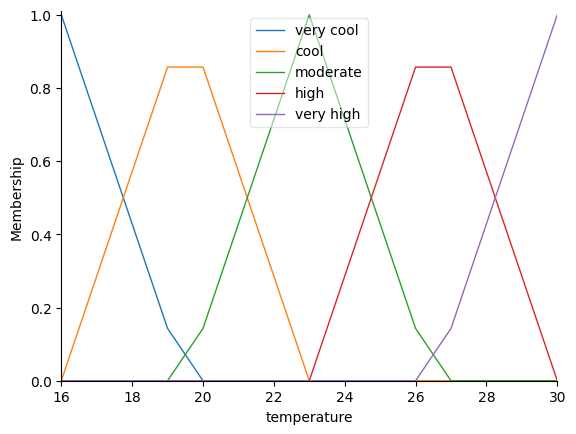

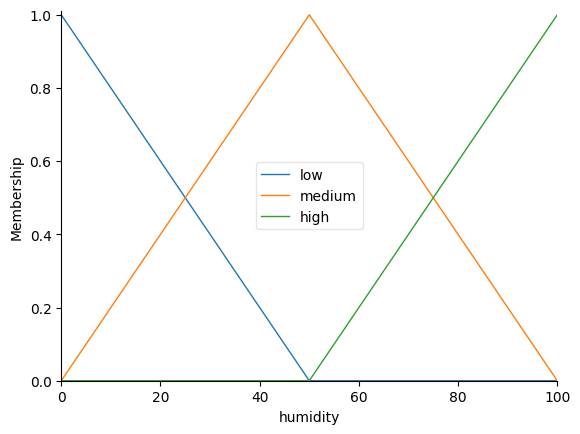

In [59]:
#membership fn for inputs

temp.automf(number=5,names=['very cool', 'cool', 'moderate', 'high', 'very high'])
humidity.automf(number=3,names=['low', 'medium', 'high'])

temp.view()
humidity.view()


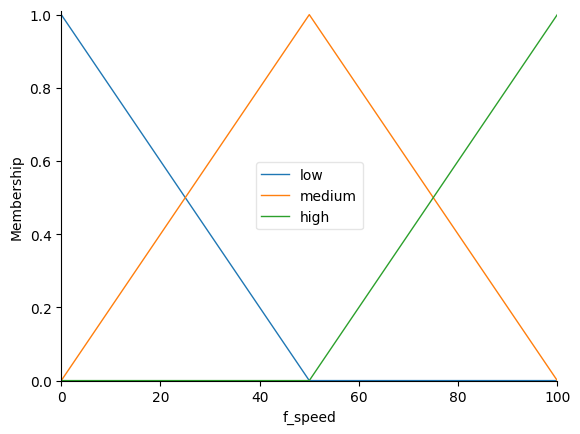

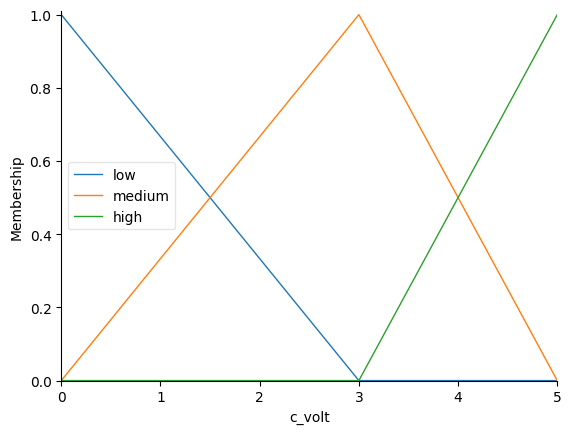

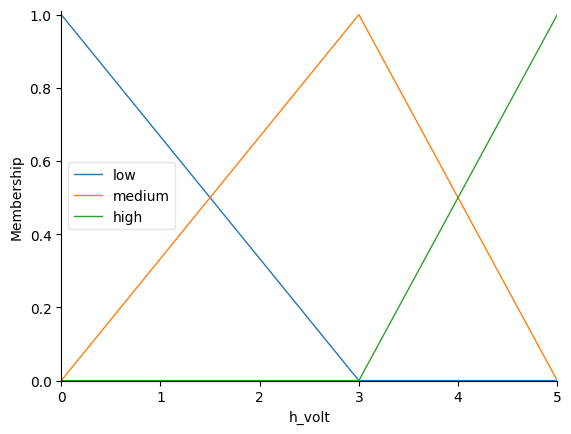

In [6]:
#custom output membership fns for f_speed

f_speed['low']= fuzz.trimf(f_speed.universe,[0,0,50])
f_speed['medium']= fuzz.trimf(f_speed.universe,[0,50,100])
f_speed['high']= fuzz.trimf(f_speed.universe,[50,100,100])

f_speed.view()

#custom output membership fns for c_volt

c_volt['low']= fuzz.trimf(c_volt.universe,[0,0,3])
c_volt['medium']= fuzz.trimf(c_volt.universe,[0,3,5])
c_volt['high']= fuzz.trimf(c_volt.universe,[3,5,5])

c_volt.view()

#custom output membership fns for h_volt

h_volt['low']= fuzz.trimf(h_volt.universe,[0,0,3])
h_volt['medium']= fuzz.trimf(h_volt.universe,[0,3,5])
h_volt['high']= fuzz.trimf(h_volt.universe,[3,5,5])

h_volt.view()


In [7]:
#rules for fuzzy logic


# Rule 1
rule1a = ctrl.Rule(temp['very high'] | humidity['high'], f_speed['high'])
rule1b = ctrl.Rule(temp['very high'] | humidity['high'], c_volt['high'])
rule1c = ctrl.Rule(temp['very high'] | humidity['high'], h_volt['high'])

# Rule 2
rule2a = ctrl.Rule(temp['high'] | humidity['medium'], f_speed['medium'])
rule2b = ctrl.Rule(temp['high'] | humidity['medium'], c_volt['medium'])
rule2c = ctrl.Rule(temp['high'] | humidity['medium'], h_volt['medium'])

# Rule 3
rule3a = ctrl.Rule(temp['moderate'] | humidity['low'], f_speed['low'])
rule3b = ctrl.Rule(temp['moderate'] | humidity['low'], c_volt['low'])
rule3c = ctrl.Rule(temp['moderate'] | humidity['low'], h_volt['low'])

# Rule 4
rule4a = ctrl.Rule(temp['cool'] | humidity['low'], f_speed['low'])
rule4b = ctrl.Rule(temp['cool'] | humidity['low'], c_volt['low'])
rule4c = ctrl.Rule(temp['cool'] | humidity['low'], h_volt['low'])

# Rule 5
rule5a = ctrl.Rule(temp['very cool'] | humidity['low'], f_speed['low'])
rule5b = ctrl.Rule(temp['very cool'] | humidity['low'], c_volt['low'])
rule5c = ctrl.Rule(temp['very cool'] | humidity['low'], h_volt['low'])


In [8]:
#build control system
control_system = ctrl.ControlSystem([
    rule1a, rule1b, rule1c,
    rule2a, rule2b, rule2c,
    rule3a, rule3b, rule3c,
    rule4a, rule4b, rule4c,
    rule5a, rule5b, rule5c
])


In [9]:
#build fuzzy system

fuzzy_system = ctrl.ControlSystemSimulation(control_system)
fuzzy_system


Fan Speed: 46.39407577977813
Compressor Voltage: 2.436392075078206
Heater Voltage: 2.436392075078206


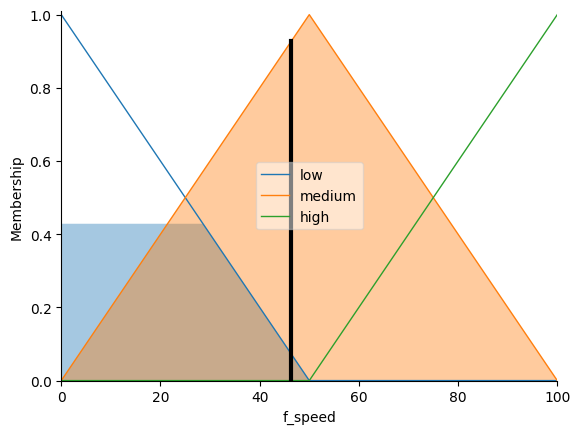

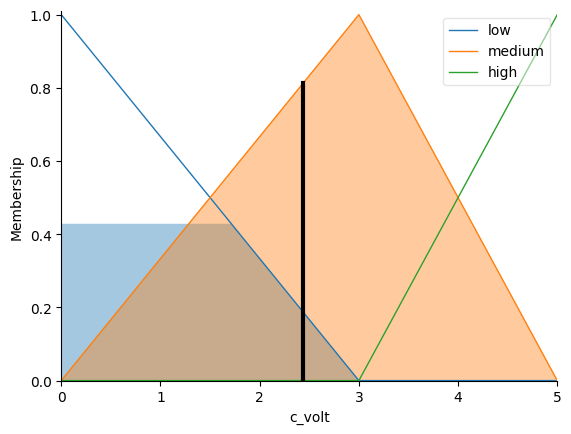

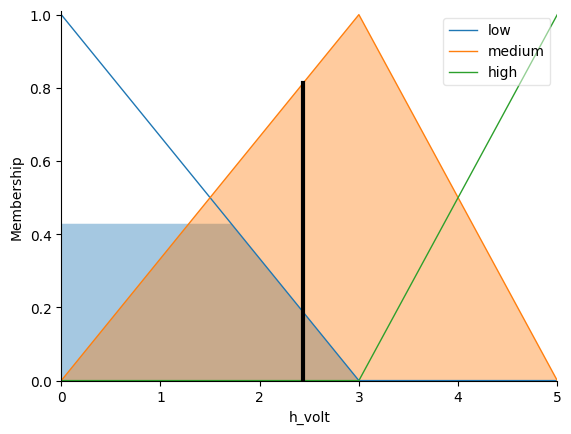

In [10]:
#testing demo values

fuzzy_system.input['temperature'] = 25
fuzzy_system.input['humidity'] = 50

fuzzy_system.compute()

print("Fan Speed:", fuzzy_system.output['f_speed'])
print("Compressor Voltage:", fuzzy_system.output['c_volt'])
print("Heater Voltage:", fuzzy_system.output['h_volt'])

f_speed.view(sim = fuzzy_system)
c_volt.view(sim = fuzzy_system)
h_volt.view(sim = fuzzy_system)


# Connect LlaMA

In [ ]:
!pip install transformers accelerate bitsandbytes


In [ ]:
!pip install -U bitsandbytes accelerate transformers


In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig
import torch

model_name = "TinyLlama/TinyLlama-1.1B-Chat-v1.0"

# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Define quantization config for 8-bit loading
quant_config = BitsAndBytesConfig(load_in_8bit=True)


from transformers import AutoModelForCausalLM
model = AutoModelForCausalLM.from_pretrained(model_name).to("cuda" if torch.cuda.is_available() else "cpu")



In [ ]:
prompt = "Generate fuzzy logic rules for HVAC system where temperature and humidity inputs control fan speed and voltage outputs."

inputs = tokenizer(prompt, return_tensors="pt").to(model.device)

outputs = model.generate(**inputs, max_new_tokens=150)

print(tokenizer.decode(outputs[0], skip_special_tokens=True))


In [ ]:
from transformers import pipeline

model_name = "TinyLlama/TinyLlama-1.1B-Chat-v1.0"
generator = pipeline("text-generation", model=model_name, device=0)

prompt = """
You are an expert in control systems. Generate fuzzy logic control rules.

Inputs:
- Temperature: very cool, cool, moderate, high, very high
- Humidity: low, medium, high

Outputs:
- Fan Speed: low, medium, high
- Compressor Voltage: low, medium, high
- Heater Voltage: low, medium, high

Generate 5 rules, Rules must follow this format excatly, only channge the [level] appropriately:
IF temperature is [level] AND/OR humidity is [level] THEN fan_speed is [level], compressor_voltage is [level], heater_voltage is [level]
"""

response = generator(prompt, max_new_tokens=300, do_sample=True, temperature=0.7)[0]['generated_text']
print(response)

rules = response.split('\n')
for rule in rules:
    if "IF" in rule and "THEN" in rule:
        print(rule.strip())


In [ ]:
rules_text = [
    "IF temperature is very cool AND humidity is high THEN fan_speed is low, compressor_voltage is medium, heater_voltage is high",
    "IF temperature is cool OR humidity is medium THEN fan_speed is medium, compressor_voltage is low, heater_voltage is medium",
    "IF temperature is moderate AND humidity is low THEN fan_speed is medium, compressor_voltage is low, heater_voltage is low",
    "IF temperature is high OR humidity is high THEN fan_speed is high, compressor_voltage is high, heater_voltage is low",
    "IF temperature is very high AND humidity is medium THEN fan_speed is high, compressor_voltage is high, heater_voltage is medium",
]


In [ ]:
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl

In [ ]:
#inputs

temp = ctrl.Antecedent(np.arange(16,31,1),'temperature')
humidity = ctrl.Antecedent(np.arange(0,101,1),'humidity')
print(temp)
print(humidity)
print(temp.universe)
print(humidity.universe)

In [ ]:
#output

f_speed = ctrl.Consequent(np.arange(0,101,1),'f_speed')
c_volt = ctrl.Consequent(np.arange(0,6,1),'c_volt')
h_volt = ctrl.Consequent(np.arange(0,6,1),'h_volt')
print(f_speed)
print(c_volt)
print(h_volt)
print(f_speed.universe)
print(c_volt.universe)
print(h_volt.universe)

In [ ]:
#membership fn for inputs

temp.automf(number=5,names=['very cool', 'cool', 'moderate', 'high', 'very high'])
humidity.automf(number=3,names=['low', 'medium', 'high'])

temp.view()
humidity.view()

In [ ]:
#custom output membership fns for f_speed

f_speed['low']= fuzz.trimf(f_speed.universe,[0,0,50])
f_speed['medium']= fuzz.trimf(f_speed.universe,[0,50,100])
f_speed['high']= fuzz.trimf(f_speed.universe,[50,100,100])

f_speed.view()

#custom output membership fns for c_volt

c_volt['low']= fuzz.trimf(c_volt.universe,[0,0,30])
c_volt['medium']= fuzz.trimf(c_volt.universe,[0,30,50])
c_volt['high']= fuzz.trimf(c_volt.universe,[30,50,50])

c_volt.view()

#custom output membership fns for h_volt

h_volt['low']= fuzz.trimf(h_volt.universe,[0,0,30])
h_volt['medium']= fuzz.trimf(h_volt.universe,[0,30,50])
h_volt['high']= fuzz.trimf(h_volt.universe,[30,50,50])

h_volt.view()


In [ ]:
print("Temperature labels:", list(temp.terms.keys()))


In [ ]:
import skfuzzy.control as ctrl

# Define fuzzy variables (assuming you’ve done this earlier in your code)
temperature = ctrl.Antecedent(np.arange(0, 51, 1), 'temperature')
humidity = ctrl.Antecedent(np.arange(0, 101, 1), 'humidity')
f_speed = ctrl.Consequent(np.arange(0, 101, 1), 'f_speed')
c_volt = ctrl.Consequent(np.arange(0, 101, 1), 'c_volt')
h_volt = ctrl.Consequent(np.arange(0, 101, 1), 'h_volt')

# Replace this with your actual fuzzy sets for temp/humidity/outputs
# temperature['very cool'], humidity['low'], etc.

# Parsing function
def parse_rule(text, index):
    logic = '&' if "AND" in text else '|'

    # Extract values
    parts = text.replace("IF ", "").replace(" THEN ", ";").split(";")
    condition, actions = parts[0], parts[1]

    conds = condition.strip().split(f" {'AND' if logic == '&' else 'OR'} ")
    cond1_key, cond1_val = conds[0].split(" is ")
    cond2_key, cond2_val = conds[1].split(" is ")

    fan_speed = actions.split(",")[0].split(" is ")[1].strip()
    comp_voltage = actions.split(",")[1].split(" is ")[1].strip()
    heater_voltage = actions.split(",")[2].split(" is ")[1].strip()

    rule_fs = ctrl.Rule(eval(f"{cond1_key.strip()}['{cond1_val.strip()}'] {logic} {cond2_key.strip()}['{cond2_val.strip()}']"), f_speed[fan_speed])
    rule_cv = ctrl.Rule(eval(f"{cond1_key.strip()}['{cond1_val.strip()}'] {logic} {cond2_key.strip()}['{cond2_val.strip()}']"), c_volt[comp_voltage])
    rule_hv = ctrl.Rule(eval(f"{cond1_key.strip()}['{cond1_val.strip()}'] {logic} {cond2_key.strip()}['{cond2_val.strip()}']"), h_volt[heater_voltage])

    return rule_fs, rule_cv, rule_hv

# Build all rules
all_rules = []
for i, r in enumerate(rules_text):
    fs, cv, hv = parse_rule(r, i)
    all_rules.extend([fs, cv, hv])

# Create control system
control_system = ctrl.ControlSystem(all_rules)
fuzzy_system = ctrl.ControlSystemSimulation(control_system)


# Connect OpenAI API

In [16]:
#install openai library

!pip install --upgrade openai

from openai import OpenAI
from getpass import getpass

#secure API key enter
api_key = getpass("Enter your OpenAI API key: ")

Enter your OpenAI API key: ··········


In [17]:
# Initialize client
client = OpenAI(api_key=api_key)

In [22]:
#prompt

prompt = """
You are an expert in control systems. Generate 5 fuzzy logic control rules.

Inputs:
- Temperature: very cool, cool, moderate, high, very high
- Humidity: low, medium, high

Outputs:
- Fan Speed: low, medium, high
- Compressor Voltage: low, medium, high
- Heater Voltage: low, medium, high

Rules must follow **this exact format**:
IF temperature is [level] AND/OR humidity is [level] THEN fan_speed is [level], compressor_voltage is [level], heater_voltage is [level]

Use only values from the lists. Do not add any extra text.
use AND or OR as you wish
"""


In [61]:
def get_temp_level(temp_c):
    if temp_c <= 10:
        return "very cool"
    elif 11 <= temp_c <= 15:
        return "cool"
    elif 16 <= temp_c <= 25:
        return "moderate"
    elif 26 <= temp_c <= 30:
        return "high"
    else:
        return "very high"

def get_humidity_level(rh_percent):
    if rh_percent <= 30:
        return "low"
    elif 31 <= rh_percent <= 60:
        return "medium"
    else:
        return "high"

# Example sensor input values:
temperature_input = 22
humidity_input = 45

temp_level = get_temp_level(temperature_input)
humidity_level = get_humidity_level(humidity_input)

# Now create your prompt using these levels
prompt1 = f"""
You are an expert in control systems. Generate 5 fuzzy logic control rule.

Inputs:
- Temperature: very cool, cool, moderate, high, very high
- Humidity: low, medium, high

Outputs:
- Fan Speed: low, medium, high
- Compressor Voltage: low, medium, high
- Heater Voltage: low, medium, high

Rules must follow **this exact format**:
IF temperature is {temp_level} AND/OR humidity is {humidity_level} THEN fan_speed is [level], compressor_voltage is [level], heater_voltage is [level]

Use only values from the lists. Do not add any extra text.
"""

#rint(prompt)


In [62]:
# Get response from gpt

response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[
        {"role": "user", "content": prompt1}
    ],
    temperature=0.5,
)

# Extract content from response
rules_text = response.choices[0].message.content
print(rules_text)


1. IF temperature is very cool AND humidity is low THEN fan_speed is low, compressor_voltage is low, heater_voltage is high  
2. IF temperature is high AND humidity is high THEN fan_speed is high, compressor_voltage is high, heater_voltage is low  
3. IF temperature is moderate AND humidity is medium THEN fan_speed is medium, compressor_voltage is medium, heater_voltage is low  
4. IF temperature is cool AND humidity is high THEN fan_speed is medium, compressor_voltage is low, heater_voltage is medium  
5. IF temperature is very high AND humidity is low THEN fan_speed is high, compressor_voltage is high, heater_voltage is low  


In [24]:
def parse_fuzzy_rule(text, rule_index=1):
    """
    Convert LLM output fuzzy rule into skfuzzy.ctrl.Rule format.
    Returns a list of rule strings.
    """
    import re

    # Clean and split rule
    rule_line = text.strip().replace("IF ", "")
    condition_part, output_part = rule_line.split(" THEN ")

    # Detect logical operator
    if " AND " in condition_part:
        conds = condition_part.split(" AND ")
        join_op = " & "
    elif " OR " in condition_part:
        conds = condition_part.split(" OR ")
        join_op = " | "
    else:
        conds = [condition_part]
        join_op = ""

    # Process conditions
    cond_exprs = []
    for cond in conds:
        var, level = cond.strip().split(" is ")
        var_map = {
            "temperature": "temp",
            "humidity": "humidity"
        }
        cond_exprs.append(f"{var_map[var.strip()]}['{level.strip()}']")

    # Join conditions
    full_condition = join_op.join(cond_exprs)

    # Process outputs
    outputs = output_part.split(",")
    output_map = {
        "fan_speed": "f_speed",
        "compressor_voltage": "c_volt",
        "heater_voltage": "h_volt"
    }

    rules = []
    for i, out in enumerate(outputs):
        var, level = out.strip().split(" is ")
        var = var.strip()
        level = level.strip()
        rule_str = f"rule{rule_index}{chr(97 + i)} = ctrl.Rule({full_condition}, {output_map[var]}['{level}'])"
        rules.append(rule_str)

    return rules


In [37]:
import re

# Clean and extract only lines that contain actual rules
llm_rules = [re.sub(r"^\d+\.\s*", "", line.strip()) for line in rules_text.split("\n") if "IF" in line and "THEN" in line]


final_rules = []
for i, rule in enumerate(llm_rules):
    fuzzy_rules = parse_fuzzy_rule(rule, i + 1)
    final_rules.extend(fuzzy_rules)

# Print the final rules in scikit-fuzzy format

for i, r in enumerate(final_rules, 1):
    print(r)
    if i % 3 == 0:
        print()  # Add blank line after every 3 rules (i.e., after 1a,1b,1c)


rule1a = ctrl.Rule(temp['very high'] & humidity['high'], f_speed['high'])
rule1b = ctrl.Rule(temp['very high'] & humidity['high'], c_volt['high'])
rule1c = ctrl.Rule(temp['very high'] & humidity['high'], h_volt['low'])

rule2a = ctrl.Rule(temp['moderate'] & humidity['medium'], f_speed['medium'])
rule2b = ctrl.Rule(temp['moderate'] & humidity['medium'], c_volt['medium'])
rule2c = ctrl.Rule(temp['moderate'] & humidity['medium'], h_volt['low'])

rule3a = ctrl.Rule(temp['cool'] | humidity['low'], f_speed['low'])
rule3b = ctrl.Rule(temp['cool'] | humidity['low'], c_volt['low'])
rule3c = ctrl.Rule(temp['cool'] | humidity['low'], h_volt['medium'])

rule4a = ctrl.Rule(temp['high'] & humidity['low'], f_speed['medium'])
rule4b = ctrl.Rule(temp['high'] & humidity['low'], c_volt['medium'])
rule4c = ctrl.Rule(temp['high'] & humidity['low'], h_volt['low'])

rule5a = ctrl.Rule(temp['very cool'] & humidity['high'], f_speed['low'])
rule5b = ctrl.Rule(temp['very cool'] & humidity['high'], c_volt['low'])

In [33]:
#build control system
control_system = ctrl.ControlSystem([
    rule1a, rule1b, rule1c,
    rule2a, rule2b, rule2c,
    rule3a, rule3b, rule3c,
    rule4a, rule4b, rule4c,
    rule5a, rule5b, rule5c
])


In [34]:
#build fuzzy system

fuzzy_system = ctrl.ControlSystemSimulation(control_system)
fuzzy_system


In [50]:
#testing demo values

fuzzy_system.input['temperature'] = 25
fuzzy_system.input['humidity'] = 50

fuzzy_system.compute()

print("Fan Speed:", round((fuzzy_system.output['f_speed']),4))
print("Compressor Voltage:", round((fuzzy_system.output['c_volt']),4))
print("Heater Voltage:", round((fuzzy_system.output['h_volt']),4))

#f_speed.view(sim = fuzzy_system)
#c_volt.view(sim = fuzzy_system)
#h_volt.view(sim = fuzzy_system)


Fan Speed: 46.3941
Compressor Voltage: 2.4364
Heater Voltage: 2.4364
